# Load libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

# Load data

In [0]:
def load_data_regression():
  diabetes = datasets.load_diabetes()
  return train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
def load_data_classification():
  digits = datasets.load_digits()
  return train_test_split(digits.data,digits.target,test_size=.25,random_state=0)

In [0]:
# adaboost provides two types of models
# 1. AdaBoostClassifier for classification
# 2. AdaBoostRegressor for regression

In [0]:
# class sklearn.ensenmble.AdaBoostRegressor()

## Params
# base_estimator: the base classifier or regressor, the default estimator is DecisionTreeClassifier. The base estimator should support the learning using sample weights
# n_estimators: integer, designate the number of base estimator, the default value is 50. The actually used estimators could be less if it performs very well, it converges
# learning_rate: float, the default is 1. Generally the smaller the learning rate, the more the estimators. The learning rate has trade off with n_estimators, so it will be changed during learning process
# loss: string could be 'linear' (default), or 'square' or 'exponential'
# random_state: integer or None or a RandomState instance

## Attributes
# estimators_: all of trained base classifiers
# estimator_weights_: all weights of individual estimators
# estimator_errors_: an array of error for each estimator
# feature_importances_: the importance of every feature

## Methods
# fit(X,y)
# predict(X)
# predict_log_proba(X)
# score(X,y), (-unlimited,1), 1- sum of test error squared / difference bewteen mean and predicted value
# staged_predict(X), array of predicted values, every iteration
# staged_score(X,y)

# test AdaBoostRegressor

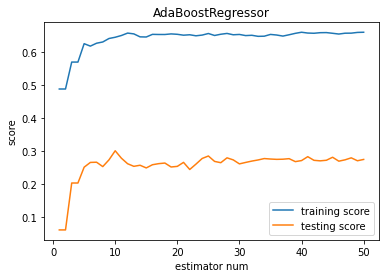

In [0]:
def test_AdaBoostRegressor(*data):
  X_train, X_test, y_train, y_test = data
  regr = ensemble.AdaBoostRegressor()
  regr.fit(X_train, y_train)
  # plt
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  estimators_num = len(regr.estimators_)
  X = range(1, estimators_num+1)
  ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label='training score')
  ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label='testing score')
  ax.set_xlabel("estimator num")
  ax.set_ylabel("score")
  ax.legend(loc='best')
  ax.set_title("AdaBoostRegressor")
  plt.show()

X_train, X_test, y_train, y_test = load_data_regression()
test_AdaBoostRegressor(X_train, X_test, y_train, y_test)

# Consider the impact from different base estimators

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear f

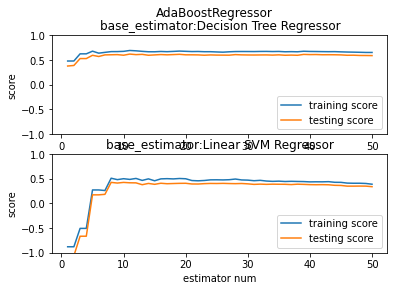

In [0]:
def test_AdaBoostRegressor_base(*data):
  from sklearn.svm import LinearSVR
  X_train, X_test, y_train, y_test = data
  fig = plt.figure()

  # base estimator
  regrs = [ensemble.AdaBoostRegressor(), ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=.01,C=100))]
  labels = ['Decision Tree Regressor','Linear SVM Regressor']

  for i,regr in enumerate(regrs):
    ax=fig.add_subplot(2,1,i+1)
    regr.fit(X_train, y_train)
    estimators_num = len(regr.estimators_)
    X = range(1, estimators_num+1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label='training score')
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label='testing score')
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc='lower right')
    ax.set_ylim(-1,1)
    ax.set_title("base_estimator:%s"%labels[i])
  plt.suptitle('AdaBoostRegressor')
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostRegressor_base(X_train, X_test, y_train, y_test)
# when using svm it occurs early stopping, svm is already a strong estimator

# Consider the impact from learning rate

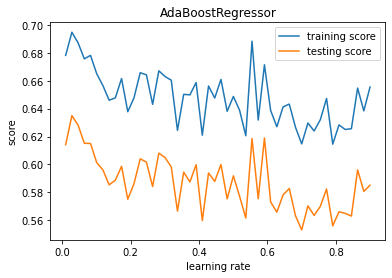

In [0]:
def test_AdaBoostRegressor_learning(*data):
  X_train, X_test, y_train, y_test = data
  fig = plt.figure()
  learning_rates=np.linspace(.01,0.9)
  ax=fig.add_subplot(1,1,1)
  training_scores=[]
  testing_scores=[]

  for learning_rate in learning_rates:
    regr = ensemble.AdaBoostRegressor(learning_rate=learning_rate, n_estimators=500)
    regr.fit(X_train, y_train)
    training_scores.append(regr.score(X_train, y_train))
    testing_scores.append(regr.score(X_test,y_test))
  ax.plot(learning_rates, training_scores, label='training score')
  ax.plot(learning_rates, testing_scores, label='testing score')
  ax.set_xlabel("learning rate")
  ax.set_ylabel("score")
  ax.legend(loc='best')
  ax.set_title('AdaBoostRegressor')
  plt.show()


X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostRegressor_learning(X_train, X_test, y_train, y_test)
# big learning rate has stable learning, but small learning rate has good prediction

# now consider the impact from loss

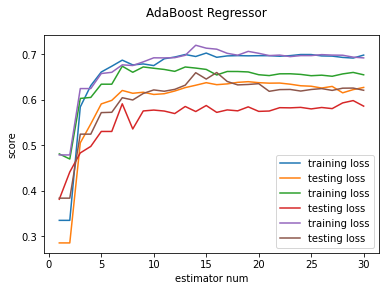

In [0]:
def test_AdaBoostClassifier_loss(*data):
  X_train, X_test, y_train, y_test = data
  losses = ['linear','square','exponential']
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  for i,loss in enumerate(losses):
    regr = ensemble.AdaBoostRegressor(loss=loss, n_estimators=30)
    regr.fit(X_train, y_train)
    estimators_num = len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label='training loss')
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label='testing loss')
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc='lower right')
  plt.suptitle('AdaBoost Regressor')
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier_loss(X_train, X_test, y_train, y_test)